<a href="https://colab.research.google.com/github/Deepanshu2601/cognitive_computing-/blob/main/Ass9cc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import re
from nltk import word_tokenize, sent_tokenize
import string
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras
from tensorflow.keras.utils import pad_sequences # Import pad_sequences from tensorflow.keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
text="TF-IDF improves BoW by reducing the weight of common words and increasing that of rare but important words. These fields are revolutionizing the way we solve real-world problems. From healthcare to autonomous vehicles, AI is making a huge impact. I enjoy reading research papers and building models that can learn from data"
tl=text.lower();
t2=re.sub(r'[^\w\s]','',tl)
print(t2)

tw=word_tokenize(t2);
ts=sent_tokenize(t2);
st=t2.split()
print(tw)
print(ts)
print(st)


tfidf improves bow by reducing the weight of common words and increasing that of rare but important words these fields are revolutionizing the way we solve realworld problems from healthcare to autonomous vehicles ai is making a huge impact i enjoy reading research papers and building models that can learn from data
['tfidf', 'improves', 'bow', 'by', 'reducing', 'the', 'weight', 'of', 'common', 'words', 'and', 'increasing', 'that', 'of', 'rare', 'but', 'important', 'words', 'these', 'fields', 'are', 'revolutionizing', 'the', 'way', 'we', 'solve', 'realworld', 'problems', 'from', 'healthcare', 'to', 'autonomous', 'vehicles', 'ai', 'is', 'making', 'a', 'huge', 'impact', 'i', 'enjoy', 'reading', 'research', 'papers', 'and', 'building', 'models', 'that', 'can', 'learn', 'from', 'data']
['tfidf improves bow by reducing the weight of common words and increasing that of rare but important words these fields are revolutionizing the way we solve realworld problems from healthcare to autonomous 

{'too', "mightn't", 'doesn', 'you', "he'd", 'doing', 'down', 'was', 'over', "don't", 'ma', 'them', 'while', 'through', 'she', "won't", 'not', 'very', "weren't", 'with', 'shouldn', "you'd", 'but', 'll', "they'll", "wasn't", "doesn't", "we'd", 'should', 'yourselves', 'couldn', 's', 'more', 'until', "it's", 'below', 'again', 't', "should've", 'their', "she'd", 'haven', "you're", 'its', "she'll", 'whom', 'hadn', "she's", 'your', 'itself', 'been', 'and', 'isn', 'such', 'yourself', "shan't", 'why', 'hasn', 'his', 'all', 'by', 'mightn', "we're", 'herself', 'him', "i'll", 'now', 'same', 'on', 'during', 'up', "you'll", 'when', 'the', 'these', 'will', 'then', 'this', 'ours', 'any', 'so', 'how', 'o', "shouldn't", 'before', 'had', 'he', 'me', 'off', 'just', 'who', 'theirs', 'what', "haven't", "that'll", 'mustn', 'i', 'are', 'being', "he'll", 've', 'most', 'each', "it'd", 'no', 'to', 'into', "needn't", 'did', 'can', 'in', "we've", "hasn't", 'there', 'yours', 'out', 're', 'for', 'further', 'is', 'th

<Axes: xlabel='Samples', ylabel='Counts'>

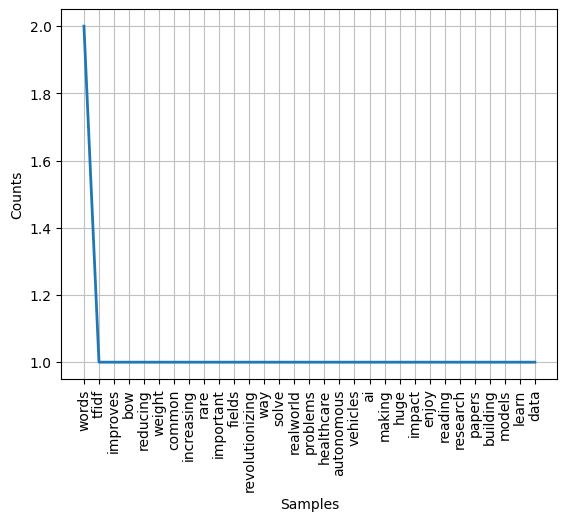

In [4]:
stop=set(stopwords.words('english'))
print(stop)

filtered =[w for w in st if not w in stop]
print(filtered)

fd=FreqDist(filtered)
fd.plot()

In [5]:
nltk.download('wordnet')
words=re.findall(r'\b[a-zA-z]+\b',text)
fil=[w for w in st if w not in words]
print(words)
print()

ps=PorterStemmer()
wnl=WordNetLemmatizer()
s1=[ps.stem(w) for w in filtered]
s2=[wnl.lemmatize(w) for w in filtered]
print(s1)
print(s2)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['TF', 'IDF', 'improves', 'BoW', 'by', 'reducing', 'the', 'weight', 'of', 'common', 'words', 'and', 'increasing', 'that', 'of', 'rare', 'but', 'important', 'words', 'These', 'fields', 'are', 'revolutionizing', 'the', 'way', 'we', 'solve', 'real', 'world', 'problems', 'From', 'healthcare', 'to', 'autonomous', 'vehicles', 'AI', 'is', 'making', 'a', 'huge', 'impact', 'I', 'enjoy', 'reading', 'research', 'papers', 'and', 'building', 'models', 'that', 'can', 'learn', 'from', 'data']

['tfidf', 'improv', 'bow', 'reduc', 'weight', 'common', 'word', 'increas', 'rare', 'import', 'word', 'field', 'revolution', 'way', 'solv', 'realworld', 'problem', 'healthcar', 'autonom', 'vehicl', 'ai', 'make', 'huge', 'impact', 'enjoy', 'read', 'research', 'paper', 'build', 'model', 'learn', 'data']
['tfidf', 'improves', 'bow', 'reducing', 'weight', 'common', 'word', 'increasing', 'rare', 'important', 'word', 'field', 'revolutionizing', 'way', 'solve', 'realworld', 'problem', 'healthcare', 'autonomous', 'vehic

In [6]:
texts = [
    "AI is changing the world with its powerful algorithms.",
    "The new phone has an amazing camera and battery life.",
    "This book provides deep insights into human psychology."
]

cv=CountVectorizer()
tfidf=TfidfVectorizer()

v1=cv.fit_transform(texts)
v2=tfidf.fit_transform(texts)

print(v1.toarray())
print(cv.get_feature_names_out())

print()

print(v2.toarray())
print(tfidf.get_feature_names_out())


for i, row in enumerate(v2):
    scores = zip(tfidf.get_feature_names_out(), row.toarray()[0])
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top3 = [word for word, score in sorted_scores[:3]]
    print(f"Top 3 keywords for Text {i+1}:", top3)

[[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0]]
['ai' 'algorithms' 'amazing' 'an' 'and' 'battery' 'book' 'camera'
 'changing' 'deep' 'has' 'human' 'insights' 'into' 'is' 'its' 'life' 'new'
 'phone' 'powerful' 'provides' 'psychology' 'the' 'this' 'with' 'world']

[[0.34142622 0.34142622 0.         0.         0.         0.
  0.         0.         0.34142622 0.         0.         0.
  0.         0.         0.34142622 0.34142622 0.         0.
  0.         0.34142622 0.         0.         0.25966344 0.
  0.34142622 0.34142622]
 [0.         0.         0.32311233 0.32311233 0.32311233 0.32311233
  0.         0.32311233 0.         0.         0.32311233 0.
  0.         0.         0.         0.         0.32311233 0.32311233
  0.32311233 0.         0.         0.         0.24573525 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.35355339 

In [7]:
text1 = set("Artificial Intelligence is a fast-growing field focusing on learning from data and making decisions.".split())
text2 = set("Blockchain is a distributed ledger technology that ensures security and transparency.".split())

jaccard=len(text1&text2)/len(text1|text2)
print(jaccard)

vec2=tfidf.fit_transform(["Artificial Intelligence is a fast-growing field focusing on learning from data and making decisions.","Blockchain is a distributed ledger technology that ensures security and transparency."])
cosS=cosine_similarity(vec2[0:1],vec2[1:2])
print(cosS)

0.13636363636363635
[[0.09349477]]


In [8]:
reviews = [
    "The product quality is excellent and exceeded my expectations.",
    "Very disappointing service. I wouldn’t recommend it to anyone.",
    "It was okay, not the best but not the worst either."
]

positive_reviews = []
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    sentiment = "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"
    print(f"Review: {review}\nPolarity: {polarity}, Subjectivity: {subjectivity}, Sentiment: {sentiment}\n")
    if sentiment == "Positive":
        positive_reviews.append(review)

Review: The product quality is excellent and exceeded my expectations.
Polarity: 1.0, Subjectivity: 1.0, Sentiment: Positive

Review: Very disappointing service. I wouldn’t recommend it to anyone.
Polarity: -0.78, Subjectivity: 0.9099999999999999, Sentiment: Negative

Review: It was okay, not the best but not the worst either.
Polarity: 0.16666666666666666, Subjectivity: 0.6, Sentiment: Positive



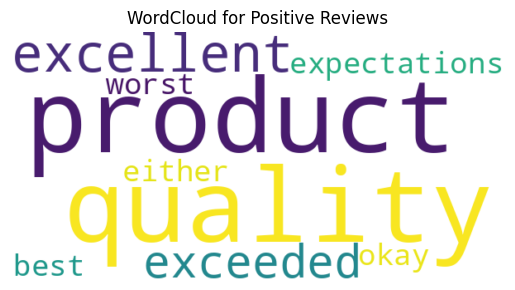

In [9]:

wc_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(wc_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Positive Reviews")
plt.show()


In [ ]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np
import tensorflow as tf

training_text = """
Deep learning is a powerful subset of machine learning. It uses neural networks to analyze patterns and data. With deep learning, computers can recognize speech, identify images, and make predictions. It is widely used in modern AI applications including autonomous vehicles and language translation. The growing field of deep learning has led to significant advancements in artificial intelligence and technology.
"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([training_text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
words = training_text.lower().split()
for i in range(1, len(words)):
    seq = words[:i+1]
    token_list = tokenizer.texts_to_sequences([" ".join(seq)])[0]
    input_sequences.append(token_list)

max_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')

# Separate input & labels
X = input_sequences[:, :-1]
y = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=total_words)

# 3. Model
model = Sequential([
    Embedding(total_words, 10, input_length=max_len-1),
    LSTM(64),
    Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=300, verbose=0)


seed_text = "deep learning"
next_words = 5

for _ in range(next_words):
    token_seq = tokenizer.texts_to_sequences([seed_text])[0]
    token_seq = pad_sequences([token_seq], maxlen=max_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_seq, verbose=0), axis=-1)
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed_text += " " + word
            break

print("Generated text:", seed_text)